In [1]:
from models import DQN
import torch
from utils import convert_multiple_layers,print_layer_information,one_hot_action, one_hot_action_arr
from receptive_fields import fit_ep, plot_receptive_fields, plot_behavior_receptive_fields
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from rastermap import Rastermap

# Untrained network

In [6]:
rl_net=DQN("DemonAttack-v0")
rl_net.run_n_episodes(env=rl_net.env,n_epsiodes=10,epsilon=0.0)
inds=[2,4,6]
activations=rl_net.activations
ts=convert_multiple_layers(inds,activations)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [7]:
def running_average(X, nbin = 100):
    Y = np.cumsum(X, axis=0)
    Y = Y[nbin:, :] - Y[:-nbin, :]
    return Y

model = Rastermap(n_components=1, n_X=100).fit(ts)
isort = np.argsort(model.embedding[:,0])

# sort by embedding and smooth over neurons
Sfilt = running_average(ts[isort, :], 50)
Sfilt = stats.zscore(Sfilt, axis=1)

nmin 200
3.7601583003997803
58.5459349155426
61.271865367889404
61.62307596206665
(98, 100)
(130,)
1.0
time; iteration;  explained PC variance
1.57s     0        0.8886      2
9.76s    10        0.8840      4
18.21s    20        0.8934      8
26.65s    30        0.9022      18
35.40s    40        0.9067      28
44.13s    50        0.9105      38
52.74s    60        0.9141      48
61.63s    70        0.9153      58
70.36s    80        0.9162      68
79.10s    90        0.9185      78
88.03s    100        0.9198      88
97.08s    110        0.9225      98
105.92s    120        0.9230      98
113.70s   final      0.9231
113.87s upsampled    0.9231


C:\Users\koester_lab\anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


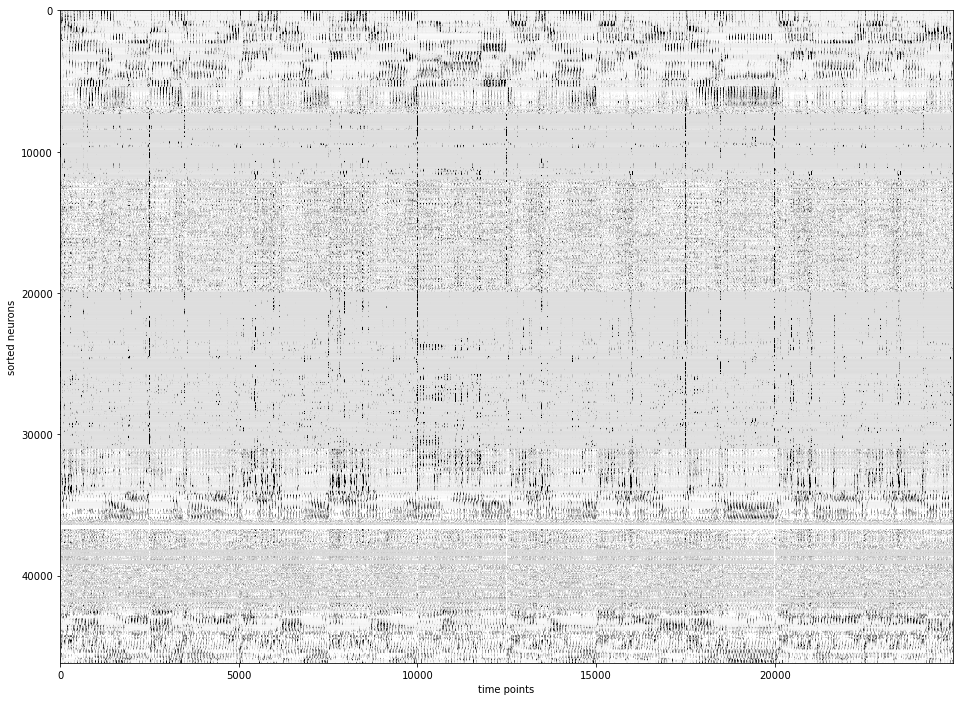

In [8]:
plt.figure(figsize=(16,12))
plt.imshow(Sfilt, vmin = -0.5, vmax=3, aspect='auto', cmap='gray_r')
plt.xlabel('time points')
plt.ylabel('sorted neurons')
plt.show()

# Trained Network

In [2]:
rl_net=DQN("DemonAttack-v0")
PATH='C:/Users/koester_lab/Documents/Maria/UdacityMachineLearningEngineerNanoDegree/dqn_model.pth'
rl_net.net.load_state_dict(torch.load(PATH))
PATH='C:/Users/koester_lab/Documents/Maria/UdacityMachineLearningEngineerNanoDegree/dqn_target_model.pth'
rl_net.target_net.load_state_dict(torch.load(PATH))
rl_net.run_n_episodes(env=rl_net.env,n_epsiodes=10,epsilon=0.0)
inds=[2,4,6]
activations=rl_net.activations
ts=convert_multiple_layers(inds,activations)

[140.0, 840.0, 100.0, 1760.0, 295.0, 220.0, 355.0, 40.0, 325.0, 370.0]


In [5]:
print(np.mean(rl_net.n_played_steps))

538.0


In [15]:
def running_average(X, nbin = 100):
    Y = np.cumsum(X, axis=0)
    Y = Y[nbin:, :] - Y[:-nbin, :]
    return Y

model = Rastermap(n_components=1, n_X=100).fit(ts)
isort = np.argsort(model.embedding[:,0])

# sort by embedding and smooth over neurons
Sfilt = running_average(ts[isort, :], 50)
Sfilt = stats.zscore(Sfilt, axis=1)

nmin 200
0.19352030754089355
3.317826986312866
3.504168748855591
3.7143707275390625
(98, 100)
(130,)
1.0
time; iteration;  explained PC variance
0.15s     0        0.0538      2
1.97s    10        0.1035      4
3.80s    20        0.1216      8
5.64s    30        0.1612      18
7.48s    40        0.1848      28
9.34s    50        0.2051      38
11.16s    60        0.2179      48
12.98s    70        0.2295      58
14.80s    80        0.2399      68
16.59s    90        0.2488      78
18.42s    100        0.2590      88
20.23s    110        0.2695      98
22.00s    120        0.2705      98
23.61s   final      0.2719
23.66s upsampled    0.2719


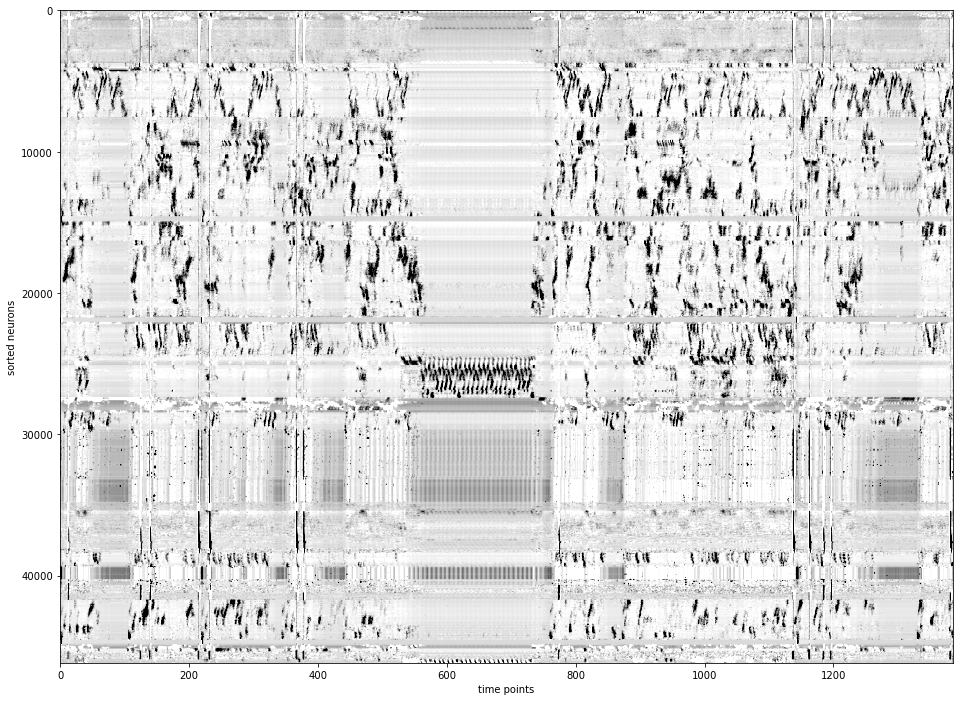

In [16]:
plt.figure(figsize=(16,12))
plt.imshow(Sfilt, vmin = -0.5, vmax=3, aspect='auto', cmap='gray_r')
plt.xlabel('time points')
plt.ylabel('sorted neurons')
plt.show()

In [ ]:
print(ts.shape)

In [10]:
V,U=fit_ep(ts,n_ensembles=100,lam=0.1)

obtained 100 PCs in 4.0302 seconds
initialized 100 clusters with k-means in 4.2094 seconds
ensemble 0, time 96.65, nr neurons 16406, EV 0.2854
ensemble 25, time 229.46, nr neurons 282, EV 0.7384
ensemble 50, time 250.33, nr neurons 66, EV 0.7541
ensemble 75, time 263.96, nr neurons 53, EV 0.7621
ensemble 99, time 276.17, nr neurons 49, EV 0.7680
average sparsity is 0.0114


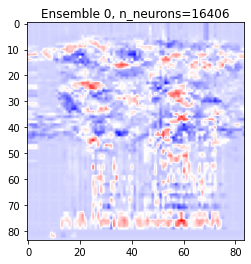

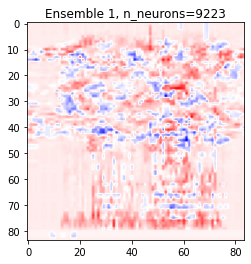

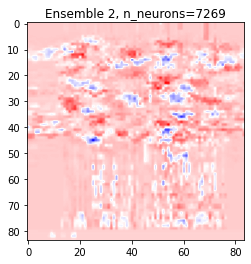

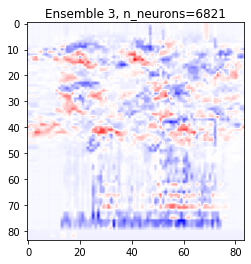

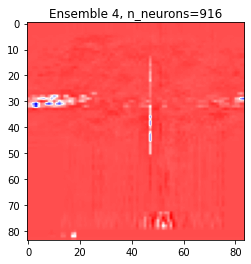

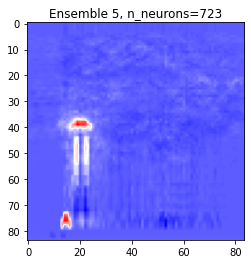

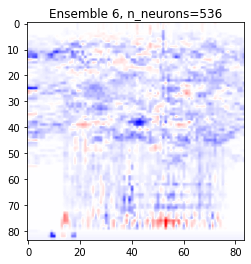

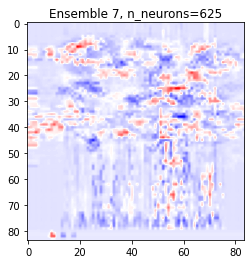

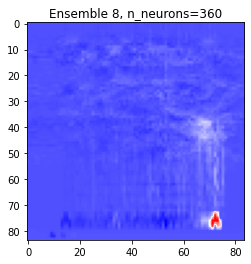

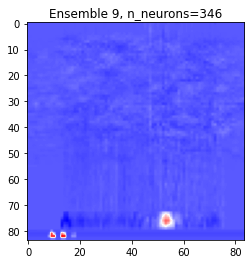

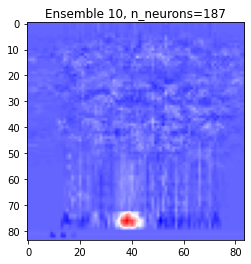

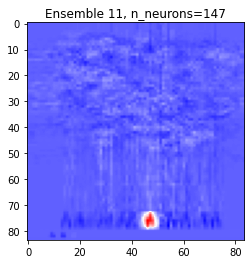

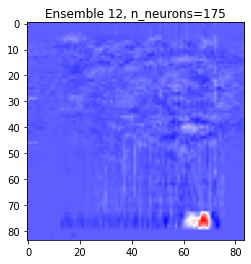

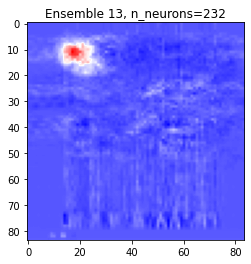

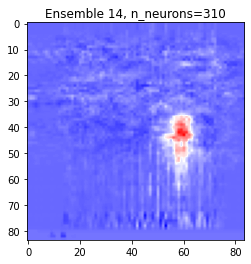

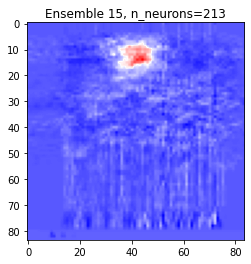

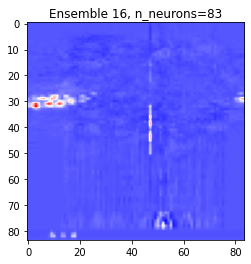

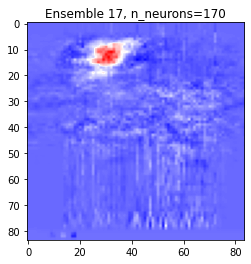

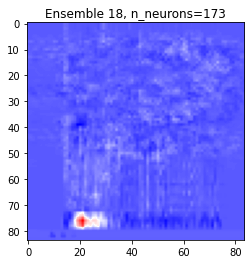

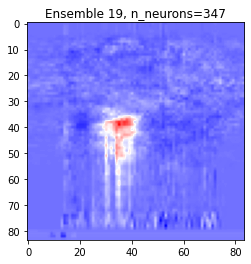

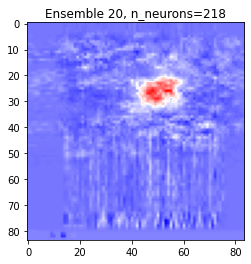

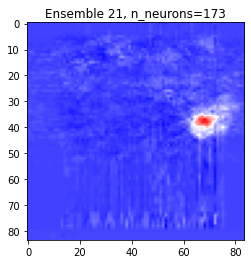

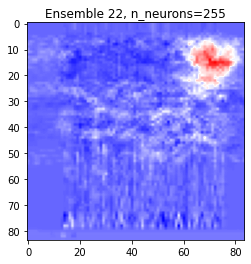

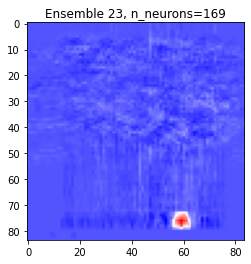

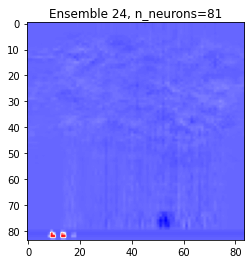

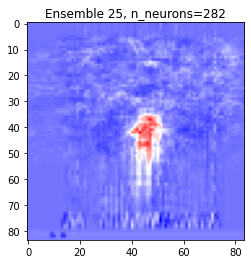

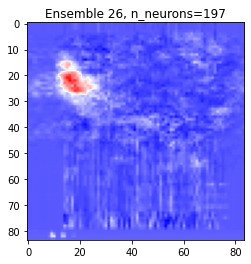

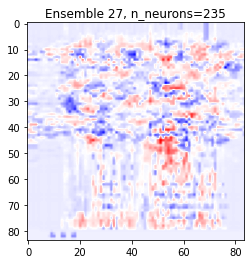

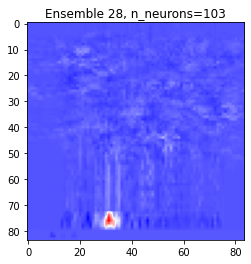

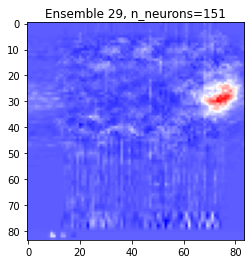

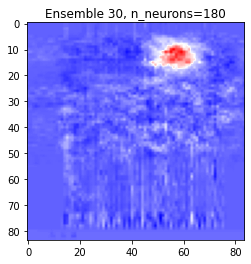

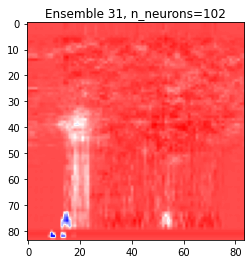

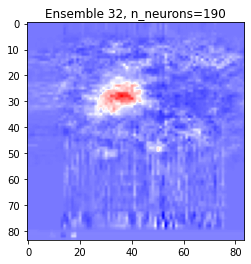

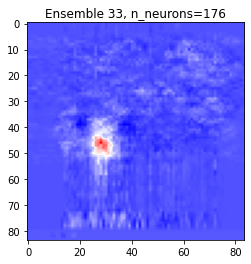

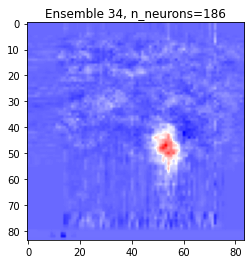

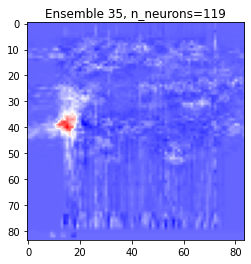

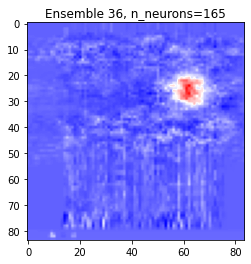

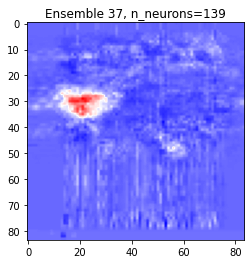

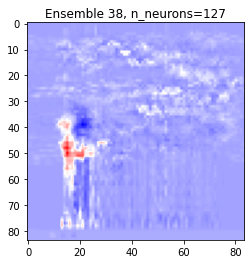

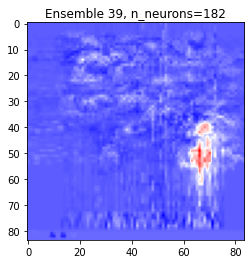

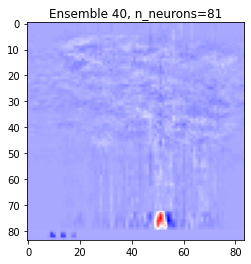

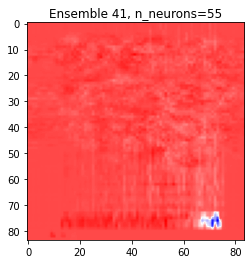

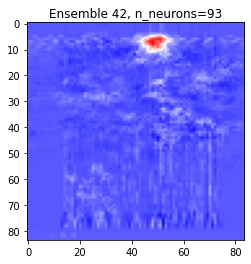

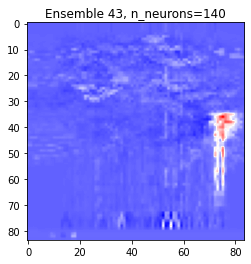

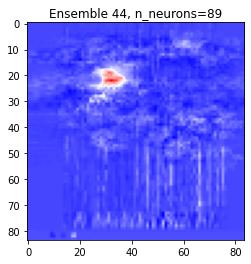

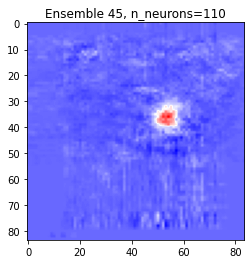

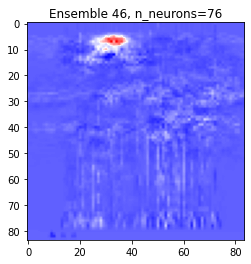

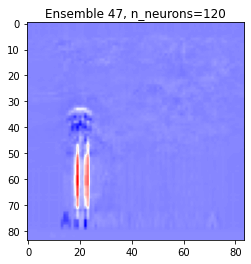

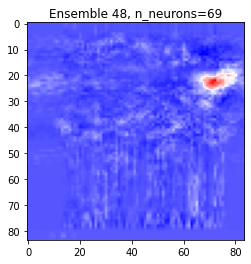

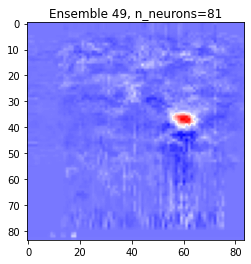

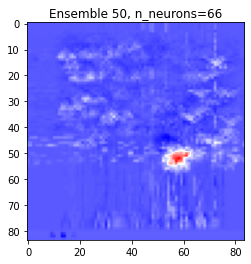

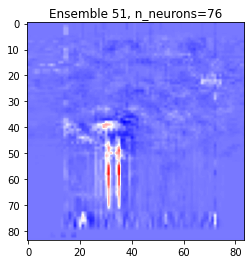

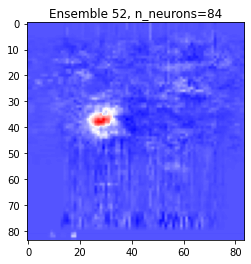

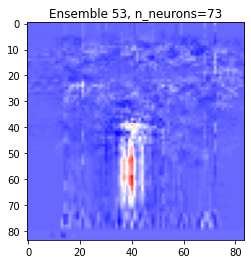

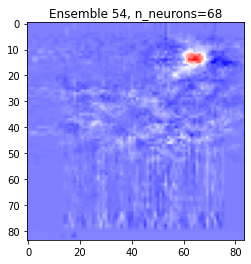

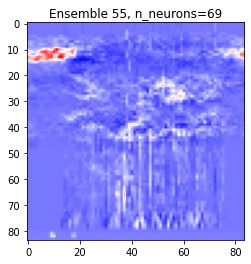

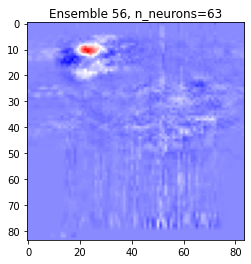

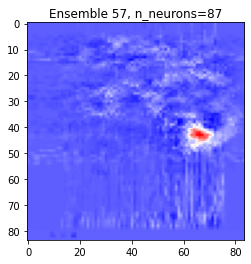

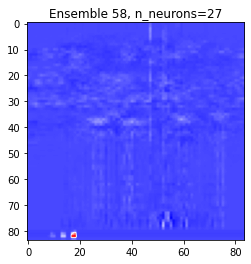

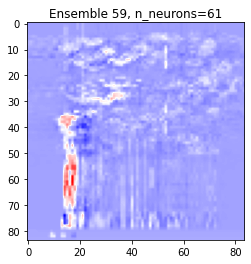

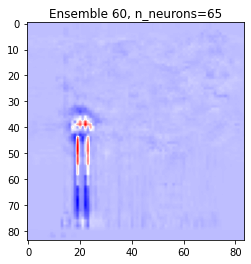

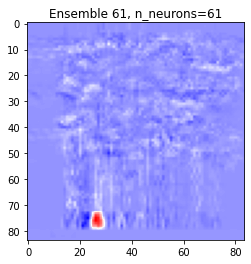

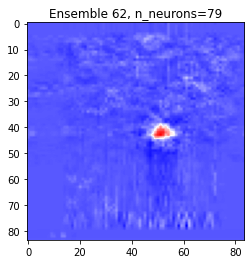

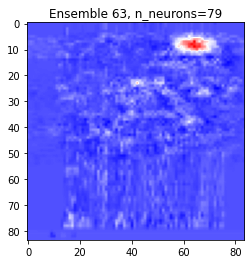

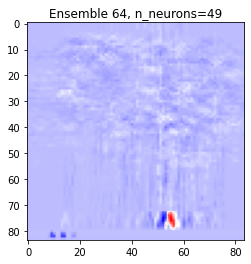

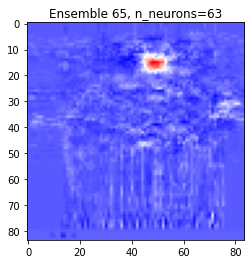

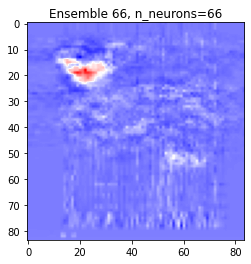

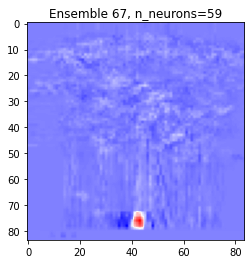

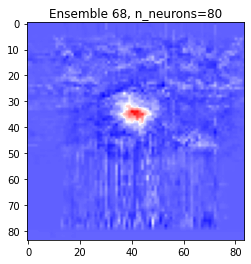

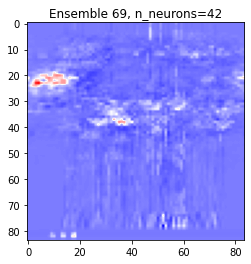

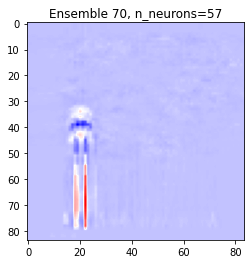

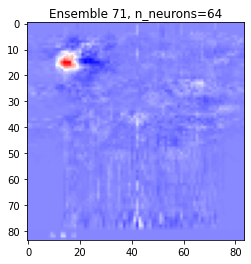

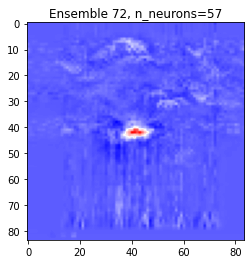

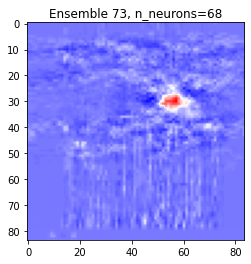

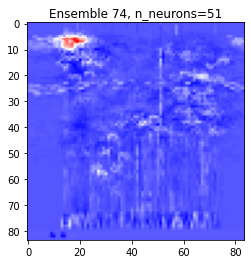

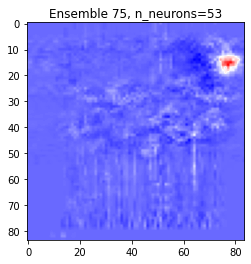

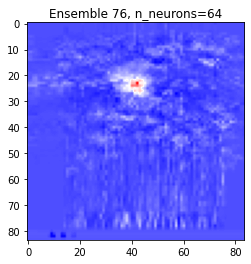

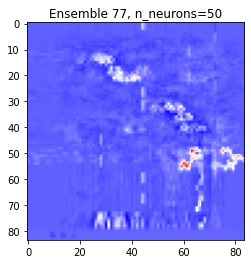

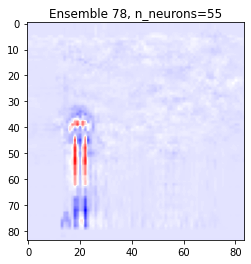

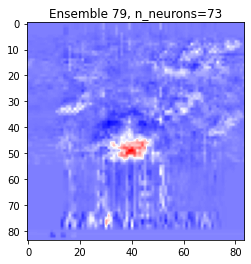

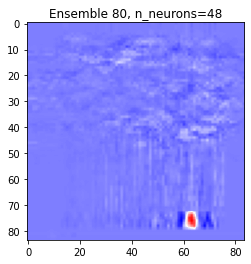

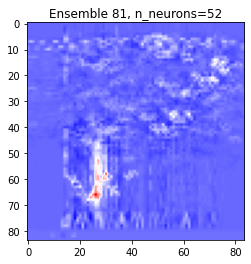

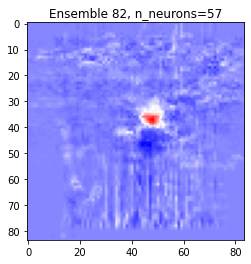

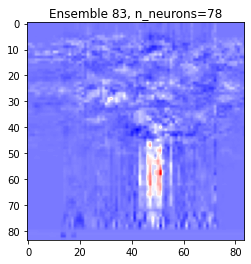

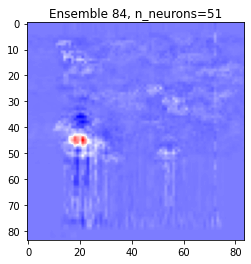

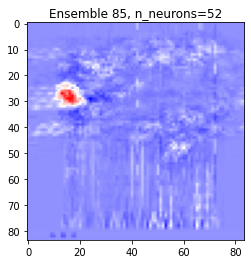

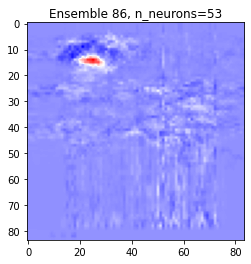

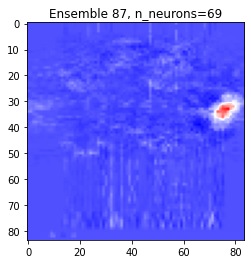

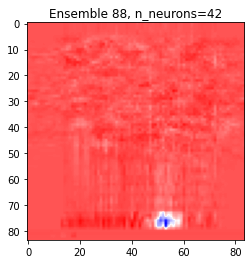

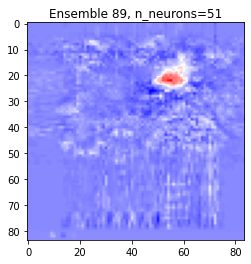

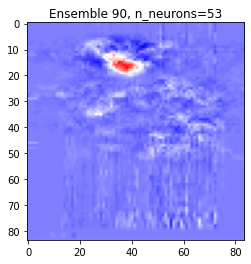

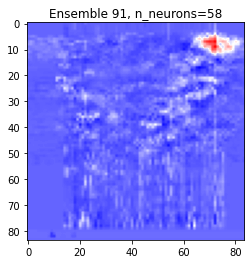

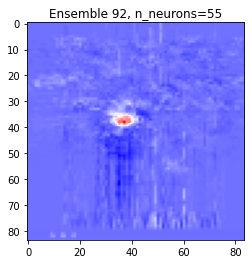

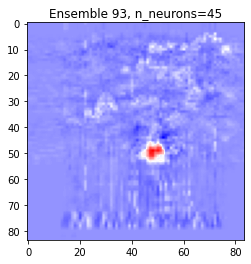

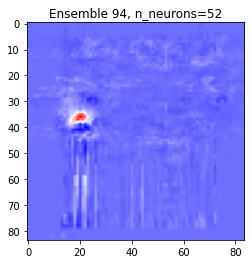

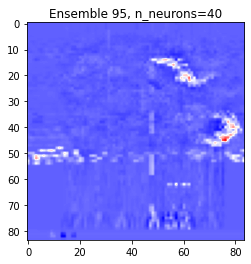

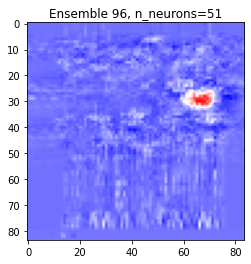

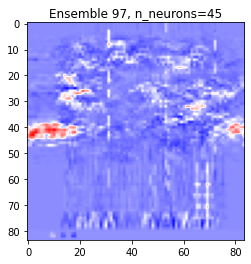

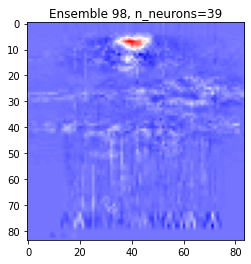

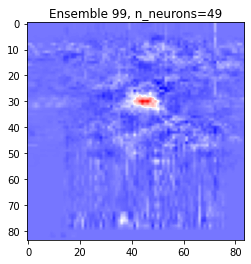

In [17]:
imgs=rl_net.im_arr
plot_receptive_fields(V,U,imgs)